* 导入机器学习算法相关工具包

In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
from sklearn.preprocessing import StandardScaler

1. 加载数据

In [186]:
data_AEF = pd.read_csv('Acoustic_Extinguisher_Fire_Dataset.csv')
data_AEF.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


3. 数据预处理

In [187]:
# 特征集,包含前6列数据
# 对非数值型类型进行编码映射
data_AEF["FUEL"] = pd.factorize(data_AEF["FUEL"])[0].astype(float)
X = data_AEF.iloc[:,0:6]
print('X:\n',X)

X:
        SIZE  FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY
0         1   0.0        10       96      0.0         75
1         1   0.0        10       96      0.0         72
2         1   0.0        10       96      2.6         70
3         1   0.0        10       96      3.2         68
4         1   0.0        10      109      4.5         67
...     ...   ...       ...      ...      ...        ...
17437     7   3.0       190       86      2.2          5
17438     7   3.0       190       84      2.0          4
17439     7   3.0       190       80      1.5          3
17440     7   3.0       190       76      0.4          2
17441     7   3.0       190       72      0.0          1

[17442 rows x 6 columns]


In [188]:
# 标签集,最后一列数据
Y = data_AEF.iloc[:, 6]
print('Y:\n',Y)

Y:
 0        0
1        1
2        1
3        1
4        1
        ..
17437    0
17438    0
17439    0
17440    0
17441    0
Name: STATUS, Length: 17442, dtype: int64


In [189]:
# 标准化——（0-1标准化）
scaler= StandardScaler()
scaler.fit(data_AEF.drop('STATUS', axis=1))
sc_transform= scaler.transform(data_AEF.drop('STATUS', axis=1))
sc_df= pd.DataFrame(sc_transform)
X = sc_transform
X_train = X[:,0:2]

4. 算法应用 : 逻辑回归 (LR)

In [190]:
# 构建逻辑回归模型 (Logistic Regression)
LR = LogisticRegression()

In [191]:
# 训练模型
LR.fit(X_train,Y)

LogisticRegression()

5. 可视化分析

In [192]:
print(X_train)

[[-1.37742194 -1.23316246]
 [-1.37742194 -1.23316246]
 [-1.37742194 -1.23316246]
 ...
 [ 2.04933508  1.76166066]
 [ 2.04933508  1.76166066]
 [ 2.04933508  1.76166066]]


In [193]:
#meshgrid函数⽣成两个⽹格矩阵
h = .02
# x_min, x_max = data_AEF.iloc[:, 0].min() - .5, data_AEF.iloc[:, 0].max() + .5
x_min, x_max = X[:, 0].min() - 1.5, X[:, 0].max() + 1.5
y_min, y_max = X[:, 1].min() - 1.5, X[:, 1].max() + 1.5
# y_min, y_max = data_AEF.iloc[:, 1].min() - .5, data_AEF.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# 调用ravel()函数将xx和yy的两个矩阵转变成一维数组,np.c_[]将数组拼接在一起
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

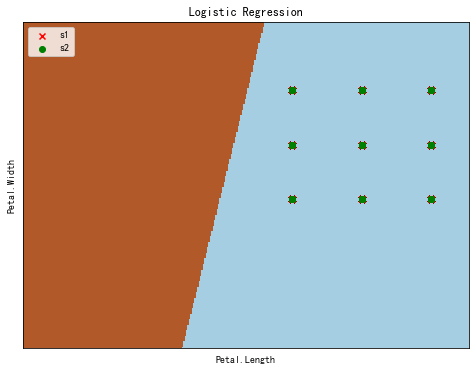

In [194]:
#pcolormesh函数将xx,yy两个⽹格矩阵和对应的预测结果Z绘制在图⽚上

plt.rcParams['font.family']=['simhei']
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

#绘制散点图
ex_data_0 = data_AEF[data_AEF["STATUS"]==0].values
ex_data_1 = data_AEF[data_AEF["STATUS"]==1].values
plt.scatter(ex_data_0[:,0],ex_data_0[:,1],marker='x', c='red', label='s1')
plt.scatter(ex_data_1[:,0],ex_data_1[:,1],marker='o', c='green', label='s2')

plt.title("Logistic Regression")
plt.xlabel("Petal.Length")
plt.ylabel("Petal.Width")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc=2)
# plt.show


